## Maria Louise Hougesen - mlho@itu.dk
### Mandatory assignment - 27/10-2022

In [1]:
#importing the necessary libraries needed for my further work
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random

In [2]:
#loading and displaying the data in a pandas DataFrame
df = pd.read_csv('Data miners 2022 (answers).csv', delimiter=',')

In [3]:
print(f'Rows: {len(df)}')
print(f'Columns: {len(df.columns)}')
df.head()

Rows: 53
Columns: 12


,Tidsstempel,What are you hoping to get out of the data mining course?,What topic are you most interested in the data mining course?,Which programme are you studying?,Why are you taking this course?,What was your first programming language?,How long time have you been programming?,How are your Python skills?,Which of the following mathematical formulas do you find understandable?\n(meaning that you are familiar with the notation used and can infer what is meant by the formula),Your mean shoe size (In European Continental system),"Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems!",How would you describe your gender?
0,29/08/2022 08.38.05,"To learn how to independently, or with groups,...",Classification,"MSc Digitial Innovation and Management, ITU",It is the most exciting,Python,6 months,I have tried to write simple scripts in Python,Valgmulighed 1,47.0,6.20,Male
1,29/08/2022 08.38.43,Bedre forståelse for områder at arbejde med data,Regression,"MSc Software Design, ITU",This was mandatory for me,Java,1 år,I have heard about it and have an idea about w...,Valgmulighed 1,39.0,167.00,Female
2,29/08/2022 08.38.53,Be able to apply the techniques in a professio...,Classification,"MSc Software Design, ITU","It is the most exciting, It'll give me busines...",Java,1 Year,I have tried to write simple scripts in Python,"Valgmulighed 1, Valgmulighed 5",42.0,68.00,Male
3,29/08/2022 08.38.56,Tools to work with real-life data,Regression,"MSc Software Design, ITU","It is the most exciting, This was mandatory fo...",Stata/R,5 years,I am quite capable of programming in Python,"Valgmulighed 1, Valgmulighed 2, Valgmulighed 3...",38.0,66.50,Female
4,29/08/2022 08.39.09,To get a thorough understanding of how to crea...,Classification,"MSc Digitial Innovation and Management, ITU","It is the most exciting, It'll give me busines...",Python,5-ish years,I have tried to write simple scripts in Python,"Valgmulighed 1, Valgmulighed 2",40.0,65.74,Female


### Cleaning for kmeans

In [4]:
#changing all column headers for better readability 
df.columns = ['tidsstempel', 'hoping_to_gain', 'interesting_topic', 'program', 'why_this_course', 'first_language', 'programming_years', 'python_skills', 'math_formulas', 'shoe_size_eu', 'height_in', 'gender']

In [5]:
#getting an overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tidsstempel        53 non-null     object 
 1   hoping_to_gain     49 non-null     object 
 2   interesting_topic  53 non-null     object 
 3   program            53 non-null     object 
 4   why_this_course    53 non-null     object 
 5   first_language     53 non-null     object 
 6   programming_years  53 non-null     object 
 7   python_skills      53 non-null     object 
 8   math_formulas      53 non-null     object 
 9   shoe_size_eu       53 non-null     float64
 10  height_in          53 non-null     float64
 11  gender             53 non-null     object 
dtypes: float64(2), object(10)
memory usage: 5.1+ KB


We see here that there is only missing values in the hoping_to_gain column. At this point in time I will not employ this column for any further analysis, so for now I will leave it be. 

So I will start my cleaning by looking at the two columns which are populated by floats as I will be employing these for my kmeans. For this section I will fix the shoe_size_eu column so that it is unison. First things first I will look for outliers

<AxesSubplot:>

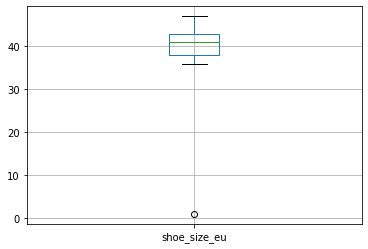

In [6]:
df.boxplot(column='shoe_size_eu') #starting off visually so gage at outliers.

In [7]:
df['shoe_size_eu'].describe()

count    53.000000
mean     40.207547
std       6.192764
min       1.000000
25%      38.000000
50%      41.000000
75%      43.000000
max      47.000000
Name: shoe_size_eu, dtype: float64

Here I can see that the min is 1, which in this instance, seeing that I am looking at shoesize, is quite unlikely. As I can now label this as a error outlier, I will fill it with the median, as seen above in the boxplot, seeing as this data set is already rather small, and I would like to keep as many datapoints as possible.

In [8]:
df['shoe_size_eu'] = df['shoe_size_eu'].replace(1, df['shoe_size_eu'].median())

In [9]:
df['shoe_size_eu'].values #checking to see if its gone - and it is

array([47. , 39. , 42. , 38. , 40. , 42. , 44. , 43. , 42. , 40. , 41. ,
       37. , 43. , 42. , 39. , 37. , 40. , 42. , 38. , 45. , 38.5, 38. ,
       45. , 39. , 43. , 46. , 38. , 39. , 39. , 41. , 38. , 37. , 38. ,
       45. , 42. , 39. , 43. , 45. , 42. , 36. , 37. , 42.5, 38. , 44. ,
       36. , 42. , 39. , 44. , 42. , 44. , 44. , 41. , 45. ])

<AxesSubplot:>

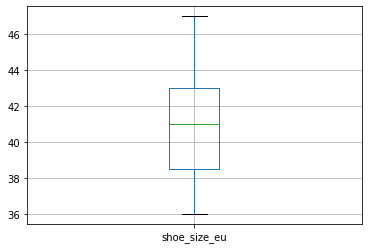

In [10]:
df.boxplot(column='shoe_size_eu') #now we have a better distribution of the data

For this section I will fix the height_in column so that it is unison. First things first I will look for outliers

<AxesSubplot:>

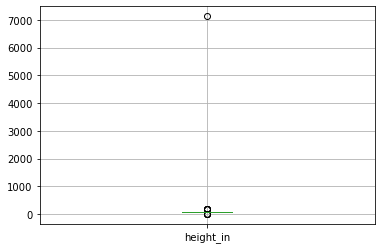

In [11]:
df.boxplot(column='height_in') #starting off visually so gage at outliers, which there clearly are

In [12]:
df['height_in'].describe()

count      53.000000
mean      206.893038
std       969.351791
min         1.000000
25%        64.900000
50%        69.000000
75%        73.000000
max      7125.984252
Name: height_in, dtype: float64

Some things appear sus...lets fix...looking at the different values in the dataset

In [13]:
df['height_in'].value_counts()

72.000000      4
74.000000      3
71.000000      2
69.000000      2
64.900000      2
64.000000      2
63.000000      2
1.000000       1
64.600000      1
66.140000      1
64.960000      1
66.900000      1
75.200000      1
68.500000      1
73.000000      1
15.580000      1
70.078740      1
61.500000      1
177.000000     1
63.780000      1
62.000000      1
70.000000      1
73.620000      1
72.830000      1
6.200000       1
65.700000      1
169.000000     1
68.000000      1
66.500000      1
65.740000      1
76.000000      1
70.900000      1
7125.984252    1
70.800000      1
6.000000       1
68.900000      1
65.748031      1
172.000000     1
170.000000     1
70.870000      1
64.500000      1
167.000000     1
75.000000      1
Name: height_in, dtype: int64

Looking at the original column question, it becomes apparent how there have been different interpretations of the question. Some have written their height in cm, others in feet and inches, and other just in inches. This I need to fix. To fix this, I will convert the different metric types into inches, as the original question demands

In [14]:
#I have found the convertion ratio's through google
cm_to_inch_ratio = 0.393700787
feet_to_inch_ratio = 12

df.loc[df['height_in'] >= 100, 'height_in'] = df['height_in'] * cm_to_inch_ratio
df.loc[df['height_in'] <= 10, 'height_in'] = df['height_in'] * feet_to_inch_ratio

<AxesSubplot:>

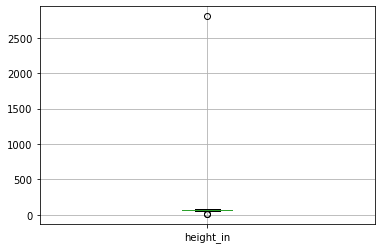

In [15]:
#checking - and seeing that there are still outliers, but this time in the form of error outliers
df.boxplot(column='height_in')

In [16]:
#I scope the outliers
df.loc[df['height_in'] >= 100]

,tidsstempel,hoping_to_gain,interesting_topic,program,why_this_course,first_language,programming_years,python_skills,math_formulas,shoe_size_eu,height_in,gender
7,29/08/2022 08.39.23,Hands-on experience with data mining algorithms.,Visualization,MSc elsewhere,It is the most exciting,Java,8 years,I am a Python wizard,"Valgmulighed 1, Valgmulighed 2, Valgmulighed 3...",43.0,2805.505608,Male


In [17]:
df.loc[df['height_in'] <= 50]

,tidsstempel,hoping_to_gain,interesting_topic,program,why_this_course,first_language,programming_years,python_skills,math_formulas,shoe_size_eu,height_in,gender
50,29/08/2022 15.01.41,Proficiency in Python and data oriented librar...,Clustering,"MSc Software Design, ITU","It is the most exciting, It'll give me busines...",C,2 years,I have tried to write simple scripts in Python,"Valgmulighed 1, Valgmulighed 2, Valgmulighed 3...",44.0,15.58,Male
51,29/08/2022 15.38.37,I hope to learn the concepts and how the conce...,Data wrangling,Non-Masters,I teach python courses at the university libra...,Python,3-4 years,I am quite capable of programming in Python,Valgmulighed 1,41.0,12.00,Male


After fixing the values, there still appears to be some discrepency, which can be attributed to the outliers, which are still outliers even though they have been multiplied with the correct values. There are three who has a height of 2805.505608, 15.580000 and 12.000000, which does not correspond to a normal human height in inches. In this case I will here identify them as error outliers and replace them with the median value, as with the shoe size.

In [18]:
df['height_in'].median() #check the median

68.9

In [19]:
#replacing their values after normalizing to inches as I then have a more representative median
df['height_in'] = df['height_in'].replace(df['height_in'].max(), df['height_in'].median())
df['height_in'] = df['height_in'].replace(15.580000, df['height_in'].median())
df['height_in'] = df['height_in'].replace(12.000000, df['height_in'].median())

<AxesSubplot:>

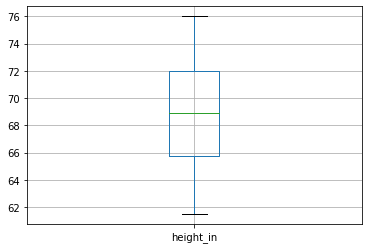

In [20]:
#looking visually again
df.boxplot(column='height_in')

Having cleaned the two float columns, I will get an overview of them, in correlation with one another

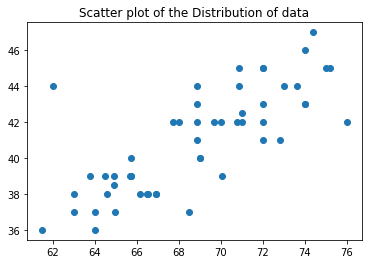

In [21]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['height_in'],df['shoe_size_eu'])
plt.show() 

After having finished my first cleaning, I am left with a dataframe of the following size

In [22]:
print(f'Rows: {len(df)}')
print(f'Columns: {len(df.columns)}')
df.head()

Rows: 53
Columns: 12


,tidsstempel,hoping_to_gain,interesting_topic,program,why_this_course,first_language,programming_years,python_skills,math_formulas,shoe_size_eu,height_in,gender
0,29/08/2022 08.38.05,"To learn how to independently, or with groups,...",Classification,"MSc Digitial Innovation and Management, ITU",It is the most exciting,Python,6 months,I have tried to write simple scripts in Python,Valgmulighed 1,47.0,74.400000,Male
1,29/08/2022 08.38.43,Bedre forståelse for områder at arbejde med data,Regression,"MSc Software Design, ITU",This was mandatory for me,Java,1 år,I have heard about it and have an idea about w...,Valgmulighed 1,39.0,65.748031,Female
2,29/08/2022 08.38.53,Be able to apply the techniques in a professio...,Classification,"MSc Software Design, ITU","It is the most exciting, It'll give me busines...",Java,1 Year,I have tried to write simple scripts in Python,"Valgmulighed 1, Valgmulighed 5",42.0,68.000000,Male
3,29/08/2022 08.38.56,Tools to work with real-life data,Regression,"MSc Software Design, ITU","It is the most exciting, This was mandatory fo...",Stata/R,5 years,I am quite capable of programming in Python,"Valgmulighed 1, Valgmulighed 2, Valgmulighed 3...",38.0,66.500000,Female
4,29/08/2022 08.39.09,To get a thorough understanding of how to crea...,Classification,"MSc Digitial Innovation and Management, ITU","It is the most exciting, It'll give me busines...",Python,5-ish years,I have tried to write simple scripts in Python,"Valgmulighed 1, Valgmulighed 2",40.0,65.740000,Female


I will now apply the kmeans algorithm to cluster the individuals from the survey as based on their height in inches and shoe size in eu 

### Kmeans

The question I am investigating: Is it possible to find clusters based upon the individuals shoe size and height? If yes, what is the connection?

To start my clustering method, I will create a new DataFrame that only contains the variables that I need and assign them all to class 1

In [45]:
kmeans_df = df[['shoe_size_eu','height_in']].copy().reset_index(drop=True) #create new dataset, only containing shoe size and height
kmeans_df['class'] = 1 #setting the class column, which will be used for the clusterings
kmeans_df.head()

,shoe_size_eu,height_in,class
0,47.0,74.400000,1
1,39.0,65.748031,1
2,42.0,68.000000,1
3,38.0,66.500000,1
4,40.0,65.740000,1


In [59]:
#initializes the centroids
def initialCentroids(kmeans_df):
    mean1 = kmeans_df.iloc[random.randint(1, len(kmeans_df))][:2] #taking two random points to initialize, but only from the first two columns, being shoe size and height
    mean2 = kmeans_df.iloc[random.randint(1, len(kmeans_df))][:2]
    return mean1, mean2

In [60]:
#calculating the euclidean distance
def calculateEuclidean(kmeans_df,pointIDX,mean1,mean2):
    point = kmeans_df.loc[[pointIDX]] #a row from the dataframe
    
    p = np.array(point)[:,:2] #takes the two first columns from the row from the dataframe, so shoe size and height, and turns them into an array
    m1 = np.array(mean1) #the coordinates for mean1 in an array
    m2 = np.array(mean2) #the coordinates for mean2 in an array
    
    #calculates the distance from the two column values and the two means
    dist_m1 = np.linalg.norm(p-m1) #we take the values from the two columns as defined in m1 and m2 and measures the distance from the first mean...
    dist_m2 = np.linalg.norm(p-m2) #...and the second mean using np.linalg.norm
    
    #assigns a class value of the mean that is the closest to the column values
    if dist_m1 < dist_m2: #so if the distance to mean 1 is shorter than the distance to mean 2, then
        kmeans_df.loc[pointIDX, 'class'] = 1 #assign class 1
    else:
        kmeans_df.loc[pointIDX, 'class'] = 2 #if not, assign class 2
        
    return kmeans_df #returns a dataframe with the closest mean assigned to the column 'class'

In [61]:
#updating the mean (the position of the centroids)
def updateCentroids(kmeans_df):
    mean1_updated = kmeans_df[kmeans_df['class'] == 1].mean()[:2] #updates the position of the centroids based on the two first columns (shoe size and height)
    mean2_updated = kmeans_df[kmeans_df['class'] == 2].mean()[:2]

    return mean1_updated, mean2_updated

In [62]:
#runs the k-means algorithm in given iterations
#this part of the code was created with inspiration from the exercise template, which I have then used, described and changed to fit my case
def Kmeans(kmeans_df,iterations):
    mean1,mean2 = initialCentroids(kmeans_df) #initializes the position of the centroids for the algorithm to work off of

    for iteration in range(iterations): #starts the first iteration

        print("Iteration {}/{}".format(iteration+1,iterations)) #prints and displays the amount of iterations
        
        for i in range(len(kmeans_df)): #for loop that runs the length of the dataframe kmeans_df
            kmeans_df = calculateEuclidean(kmeans_df,i,mean1,mean2) #calculates the euclidean distance and assigns each row to a class based on the closest mean/centroid
            
        mean1,mean2 = updateCentroids(kmeans_df) #updates the position of the centroids

    return kmeans_df,mean1,mean2 #returns the dataframe and the final centroids

Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5


<Figure size 432x288 with 0 Axes>

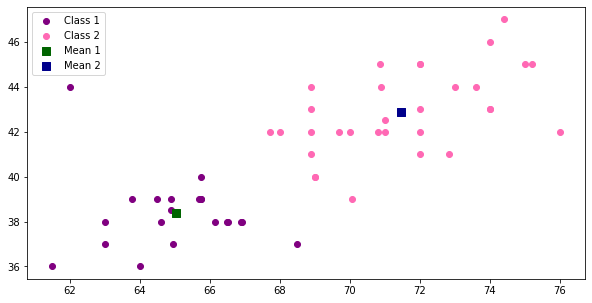

In [63]:
kmeans_df,mean1,mean2 = Kmeans(kmeans_df,5) #tells the function to do 5 iterations

class1 = kmeans_df.loc[kmeans_df['class'] == 1] #appoints the given clusters/classes to variables
class2 = kmeans_df.loc[kmeans_df['class'] == 2]

#visualizing the scatterplot with the kmeans clustering and the final mean/centroids
plt.clf()
plt.figure(figsize=(10,5))

#class visualizing
plt.scatter(class1['height_in'],class1['shoe_size_eu'],color='purple',label='Class 1')  
plt.scatter(class2['height_in'],class2['shoe_size_eu'],color='hotpink',label='Class 2')

#mean visualizing
plt.scatter(mean1['height_in'],mean1['shoe_size_eu'],s=80,label='Mean 1',marker='s',color='darkgreen')
plt.scatter(mean2['height_in'],mean2['shoe_size_eu'],s=80,label='Mean 2',marker='s',color='darkblue')

plt.legend()
plt.show()

Note to the visualization: given that the k-means algorithm is nondeterministic given its random initialization steps and beginning centroid positions, the scatterplot will potentially look different when you (TA's) run it, compared to the screenshot in the written paper.

What we here see is that there are two clusters within the dataset, as based on these two features of height and shoe size, where the data points in each cluster are comparable and similar to each other based on a similarity measure of the euclidean distance. Meaning that as a result, each cluster will have data points with similar features. So applying this to these clusterings, in a generalization cluster 1 clustered individuals that may be considered tall and with a larger show size, and cluster 2 may be considered short and with a lower shoe size (aside of the outlier at the 44 shoe size mark)

In [64]:
#predicts the position of a new point in one of the two identified clusters
def predictKMeans(shoe_size, height, mean1=mean1, mean2=mean2):
    mean1 = np.array(mean1) #the final first mean to an array
    mean2 = np.array(mean2) #the final second mean to an array
    p = [shoe_size,height] #the two values
    
    dist_m1 = np.linalg.norm(p-mean1) #calculate the distance again
    dist_m2 = np.linalg.norm(p-mean2)
    
    if dist_m1 < dist_m2: #if the distance from the first mean is shorter than the distance to the second mean
        predicted_class = 1 #class 1
    else:
        predicted_class = 2 #otherwise class 2
        
    print(f"This person is in class {predicted_class}")

In [65]:
predictKMeans(shoe_size=44, height=70)

This person is in class 2


In [66]:
predictKMeans(height=44, shoe_size=70)

This person is in class 1


### Feature engineering for naïve bayes

I will start by looking into the 'first_language' column, to see if I need to do any cleaning or feature engineering

In [32]:
df['first_language'].value_counts()

Java                                                                                                                         21
Python                                                                                                                       10
java                                                                                                                          3
Python                                                                                                                        3
Javascript                                                                                                                    3
C++                                                                                                                           2
JavaScript                                                                                                                    2
R                                                                                                       

By looking at this I see there are some instances where the values are counted multiple times given its case sensitivity - I will fix

In [33]:
#setting both lower case and removing leading and trailing white spaces
df.first_language = df.first_language.apply(lambda x: x.lower().strip())

In [34]:
df['first_language'].value_counts() #check again

java                                                                                                                         24
python                                                                                                                       14
javascript                                                                                                                    5
c++                                                                                                                           2
r                                                                                                                             2
stata/r                                                                                                                       1
f#                                                                                                                            1
python will be my first programming language, because this semester im also doing the introcuction to pr

In [35]:
#further engineering to remove elaborate sentences exceeding 1 language
df.loc[3,"first_language"] = 'stata'
df.loc[33,"first_language"] = 'python'
df.loc[35,"first_language"] = 'python'
df.loc[45,"first_language"] = 'java'

In [36]:
df['first_language'].value_counts() #check again

java          25
python        16
javascript     5
c++            2
r              2
stata          1
f#             1
c              1
Name: first_language, dtype: int64

Moving on to my y = gender

In [37]:
df['gender'].value_counts()

Male          27
Female        25
Non binary     1
Name: gender, dtype: int64

Seeing as this prediction or assignment is not concerning anything regarding gender normaties, and as to not misclassify this individuel, I will drop this person from the dataframe

In [38]:
df = df[df.gender != 'Non binary']
df['gender'].value_counts()

Male      27
Female    25
Name: gender, dtype: int64

### Naïve bayes

The question I am investigating: Is it possible to predict gender based on the first programming language? If yes, what is the likelihood of being a man if your first programming language is python?

In [39]:
#create df only containing the two columns of interest
naive_df = df[['first_language', 'gender']]
naive_df.head()

,first_language,gender
0,python,Male
1,java,Female
2,java,Male
3,stata,Female
4,python,Female


In [40]:
#To work with the data, I will convert the pandas dataframe to a list of tuples
naives_list = naive_df.to_records(index=False)
naives_list = list(naives_list)
print(naives_list)

[('python', 'Male'), ('java', 'Female'), ('java', 'Male'), ('stata', 'Female'), ('python', 'Female'), ('python', 'Male'), ('python', 'Male'), ('java', 'Male'), ('python', 'Male'), ('python', 'Female'), ('java', 'Male'), ('python', 'Male'), ('java', 'Male'), ('java', 'Female'), ('f#', 'Female'), ('python', 'Female'), ('c++', 'Male'), ('javascript', 'Female'), ('python', 'Male'), ('r', 'Female'), ('javascript', 'Female'), ('javascript', 'Male'), ('java', 'Female'), ('python', 'Male'), ('java', 'Male'), ('python', 'Female'), ('java', 'Female'), ('java', 'Female'), ('java', 'Female'), ('java', 'Female'), ('javascript', 'Female'), ('java', 'Female'), ('python', 'Male'), ('java', 'Male'), ('python', 'Female'), ('java', 'Female'), ('java', 'Male'), ('c++', 'Male'), ('java', 'Female'), ('javascript', 'Female'), ('r', 'Male'), ('python', 'Female'), ('java', 'Male'), ('python', 'Female'), ('java', 'Male'), ('java', 'Female'), ('java', 'Male'), ('java', 'Male'), ('java', 'Male'), ('c', 'Male'), (

In [41]:
#this part of the code was created with inspiration from the exercise template, which I have then used, described and changed to fit my case
def train(naives_list):
    model = {} #dictionary that are going to store the counts
    for first_language, gender in naives_list: #iterates over each instance from the above created naive_list
        if gender not in model: #if the gender is not in the dictionary
            model[gender] = {} #create gender key and initialize in sub dictionary
        if first_language not in model[gender]: #if the first_language is not in the model dictionary given gender
            model[gender][first_language] = 0 #initialize as 0
            
        model[gender][first_language] += 1 #add 1

        #keep track of how many times each gender is observed
        if 'observed' not in model[gender]: #if not counted yet
            model[gender]['observed'] = 0 #create key and give value 0

        model[gender]['observed'] += 1 #iterates counter
    return model    

In [42]:
#the above function creates the following dictionary storing the counts and keys
parameters = train(naives_list)
print(parameters)

{'Male': {'python': 9, 'observed': 27, 'java': 13, 'c++': 2, 'javascript': 1, 'r': 1, 'c': 1}, 'Female': {'java': 11, 'observed': 25, 'stata': 1, 'python': 7, 'f#': 1, 'javascript': 4, 'r': 1}}


In [43]:
#this function runs the naive bayes algorithm
def predict(parameters, language):
    mle = {} #create a dictionary for the maximum likelihood

    total_observed = 0 #gender
    total_language = 0 #first_language
    for gender in parameters: #looking for gender in dictionary with 2 iterations given the 2 genders
        if language not in parameters[gender]: #if the language is not in the gender key
            parameters[gender][language] = 0 #then create language key and give value 0
            
        total_observed += parameters[gender]['observed'] #summarizes the amount of observations across genders
        total_language += parameters[gender][language] #summarizes the amount of observations with a given first_language across genders

    for gender in parameters: #for each gender in the dictionary
        mle[gender] = 0 #initialize maximum likelihood as 0

        gender_prob = parameters[gender]['observed']/total_observed #P(A) - probability for each gender/prior probability - the count of each gender divided by the total amount of rows
        language_prob = total_language/total_observed               #P(B) - probability for first_language/marginal likelihood - the count of a coding language divided by the total amount of rows
        conditional_prob = (parameters[gender][language]/parameters[gender]['observed']) #P(B|A) - conditional probability/likelihood - the probability of first_language given gender, so fx python = 9 and male = 27 --> 9/27 = likelihood
        try:
            if language in parameters[gender]: #if this first_language was seen within the observed gender
                mle[gender] = (conditional_prob*gender_prob)/language_prob #P(A|B) = (P(B|A) * P(A)) / P(B) --> Get the maximum likelihood for that gender based on bayes theroum
        except:
            mle[gender] = 0 #set as 0 if the first_language is not known
            
    print("Likelihood for each gender:", mle) #print the maximum likelihood of each gender

    best_estimate = ['', 0] #a container that is getting the gender and maximum likelihood
    for gender in mle: #for genders we have calculated mle on
        if mle[gender] > best_estimate[1]: #if the mle for this gender is higher than the one before
            best_estimate = [gender, mle[gender]] #set both gender and likelihood in the container

    return best_estimate

In [44]:
language = 'python'

prediction = predict(parameters, language)

if prediction[0]:
    print('If your first programming language is', language, 'then you are most likely a', prediction[0])
else:
    print('If your first programming language is', language, 'you are most likely an alien, or outside of my supervised knowledge')


Likelihood for each gender: {'Male': 0.5625, 'Female': 0.43750000000000006}
If your first programming language is python then you are most likely a Male
